### Exploratory Analysis

The main idea is to apply some quantitative trading to the Crypto-sphere and to see if we can create some trading strategies with decent $\alpha$. In the future, it may be possible to run the mutual fund using both algorithmic trading and manual trading (via. Will's domain knowledge).

In order to start algorithmically trading, we need to first decide which currencies that we are willing to trade. We will also need to create a market index to use as the baseline for measuring how well a strategy is actually performing. 

#### Establishing a Market Index

From [Investopedia](https://www.investopedia.com/terms/m/marketindex.asp#ixzz555QvCO80):

`
A market index is an aggregate value produced by combining several stocks or other investment vehicles together and expressing their total values against a base value from a specific date. Market indexes are intended to represent an entire stock market and thus track the market's changes over time. 
`

We will choose coins for the index based on their individual market caps; this approach allows us to get a good measurement for the coin markets while keeping the total number of coins in our portfolio small. Data is collected from calling the CoinMarketCap API.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


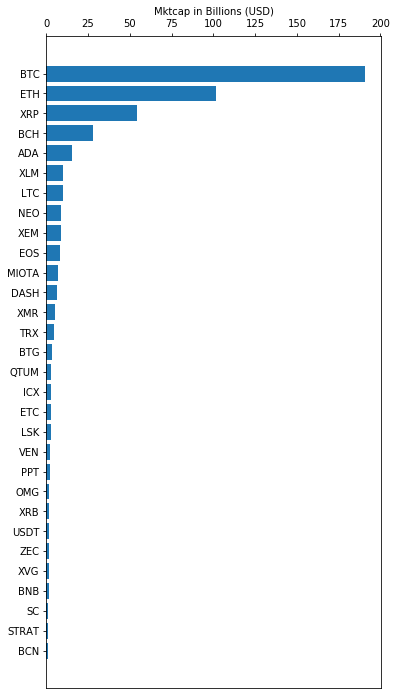

In [93]:
%matplotlib inline

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N_COINS = 30

json = pd.read_json(f'https://api.coinmarketcap.com/v1/ticker/?limit={N_COINS}')
df = df[['rank', 'symbol', 'price_usd', 'market_cap_usd', 
         '24h_volume_usd', 'percent_change_24h', 'percent_change_7d']]
df = df.convert_objects(convert_numeric=True)

fig, ax = plt.subplots(figsize=(6, 12))

ax.barh(df['rank'], df['market_cap_usd']/10**9)
ax.invert_yaxis()
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set_xlabel('Mktcap in Billions (USD)')
plt.setp(ax, yticks=np.arange(1, N_COINS+1), yticklabels=df['symbol'])

#ax.set_xticklabels(df["symbol"])

plt.show()


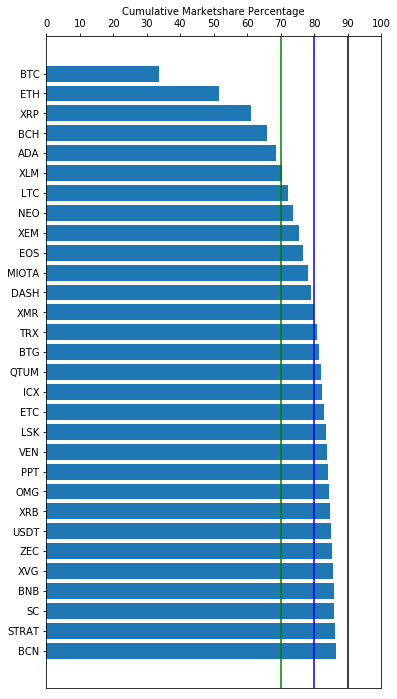

0     33.608186
1     51.468771
2     60.985919
3     65.951080
4     68.652058
5     70.448695
6     72.215728
7     73.810449
8     75.334834
9     76.801548
10    78.045600
11    79.128265
12    80.008241
13    80.797136
14    81.373429
15    81.911453
16    82.448812
17    82.966229
18    83.429417
19    83.842678
20    84.191689
21    84.504578
22    84.811071
23    85.096477
24    85.348386
25    85.592438
26    85.835914
27    86.059237
28    86.281896
29    86.494897
Name: market_cap_usd, dtype: float64


In [92]:
json = requests.get('https://api.coinmarketcap.com/v1/global/').json()
total_mkt_cap = json['total_market_cap_usd']

fig, ax = plt.subplots(figsize=(6, 12))
ax.barh(df['rank'], 100*df['market_cap_usd'].cumsum()/total_mkt_cap)
ax.invert_yaxis()
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set_xlabel('Cumulative Marketshare Percentage')
plt.setp(ax, yticks=np.arange(1, N_COINS+1), yticklabels=df['symbol'])


plt.axvline(x=70, color="green")
plt.axvline(x=80, color="blue")
plt.axvline(x=90, color="black")
plt.xticks(np.arange(0, 101, 10))

plt.show()

print((100*df['market_cap_usd'].cumsum()/total_mkt_cap))

By adjusting the `N_COINS` variable, we can see that the top 100 coins makes up approximately 95% of the market cap, while the top 5, 10, and 35 make up 70%, 80%, and 90% respectively. 